In [1]:
import matplotlib.pyplot as plt

# SIMPLE RNN-RNN1
    -VISWANADH
    

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
x=np.linspace(0,50,501)

In [4]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [5]:
y=np.sin(x)

In [6]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

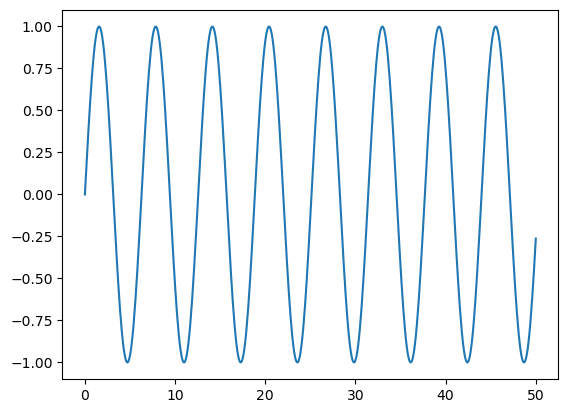

In [7]:
plt.plot(x,y)

In [8]:
df=pd.DataFrame(data=y,index=x,columns=["Sine"])

In [9]:
df.head(5)

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [10]:
len(df)

501

In [11]:
test_ind=451

In [12]:
train=df.iloc[:475]

In [13]:
test=df.iloc[475:]

In [14]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
47.0,0.123573
47.1,0.023888
47.2,-0.076037
47.3,-0.175201


In [15]:
from sklearn.preprocessing import MinMaxScaler

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
scaler=MinMaxScaler()

In [17]:
scaled_train=scaler.fit_transform(train)

In [18]:
scaled_test=scaler.transform(test)

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.legacy.preprocessing.sequence:

class TimeseriesGenerator(keras.src.trainers.data_adapters.py_dataset_adapter.PyDataset)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  DEPRECATED.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Le

In [21]:
length=25
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

Length:No.of inputs required to forecast the outcome.
Batch_size:No of items needed to be iterated for manipulating weights.

In [22]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458],
         [0.64776041],
         [0.69470985],
         [0.73971381],
         [0.78232262],
         [0.82211054],
         [0.85868004],
         [0.89166571],
         [0.92073798],
         [0.94560637],
         [0.9660224 ],
         [0.98178208],
         [0.99272794],
         [0.99875061],
         [0.99978993],
         [0.9958355 ],
         [0.98692684],
         [0.97315296],
         [0.95465148],
         [0.93160726],
         [0.90425056],
         [0.87285471],
         [0.83773342]]]),
 array([[0.79923759]]))

<AxesSubplot:>

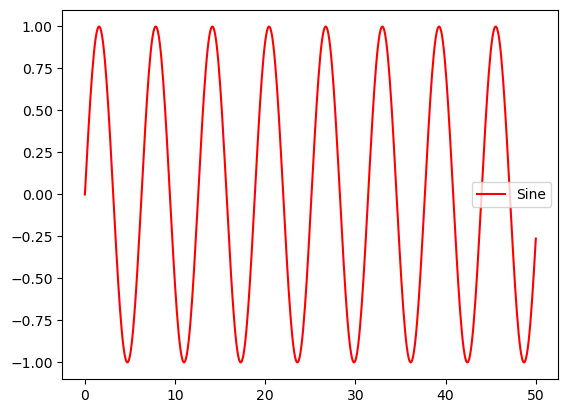

In [23]:
df.plot(kind="line",color="red")

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [25]:
n_features=1

In [26]:
model=Sequential()
model.add(SimpleRNN(50,input_shape=(length,1)))
model.add(Dense(1))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam',loss='mse')

In [28]:
model.fit(generator,epochs=5)

Epoch 1/5
 48/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0700

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0180
Epoch 2/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5242e-04
Epoch 3/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0028
Epoch 4/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8059e-05
Epoch 5/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.5895e-06


In [29]:
losses_df=pd.DataFrame(model.history.history)

In [30]:
losses_df.head(5)

,loss
0,0.005086
1,0.000559
2,0.000990
3,0.000032
4,0.000018


<AxesSubplot:>

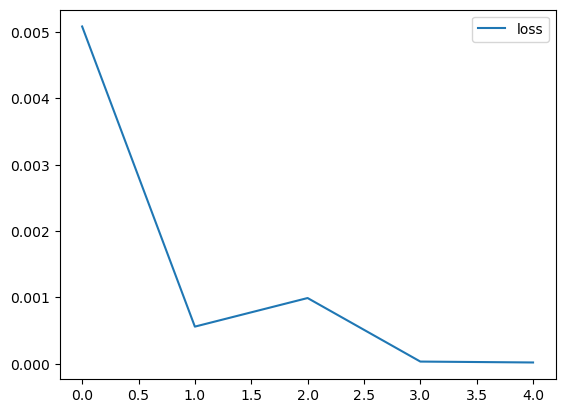

In [31]:
losses_df.plot(kind="line")

In [32]:
first_eval_batch=scaled_train[-length:]


In [33]:
first_eval_batch

array([[0.92545429],
       [0.94955134],
       [0.96915662],
       [0.98407422],
       [0.99415511],
       [0.99929856],
       [0.99945317],
       [0.9946174 ],
       [0.98483957],
       [0.97021737],
       [0.95089691],
       [0.92707122],
       [0.89897838],
       [0.86689906],
       [0.8311538 ],
       [0.79209975],
       [0.75012713],
       [0.70565531],
       [0.65912865],
       [0.61101201],
       [0.56178617],
       [0.51194298],
       [0.46198044],
       [0.41239778],
       [0.3636904 ]])

In [34]:
print(np.shape(first_eval_batch))

(25, 1)


In [35]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))

In [36]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([[0.3152499]], dtype=float32)

In [37]:
scaled_test[0]

array([0.31634497])

In [38]:
scaled_test

array([[3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],
       [4.05060876e-02],
       [6.24843152e-02],
       [8.88340461e-02],
       [1.19292002e-01],
       [1.53553858e-01],
       [1.91277281e-01],
       [2.32085350e-01],
       [2.75570325e-01],
       [3.21297718e-01],
       [3.68810636e-01]])

# Evaluating  our predictions

In [39]:
results=[]
i=25
sliding_set=df.iloc[451:476]
while i!=0:    
    sliding_set=np.asarray(sliding_set)
    sliding_set=sliding_set.reshape((1,length,n_features))
    ans=model.predict(sliding_set)
    print(ans)
    results.append(ans.tolist()[0][0])
    sliding_set=sliding_set.reshape(-1)
    sliding_set=sliding_set.tolist()
    sliding_set.pop(0)
    sliding_set.append(ans.tolist()[0][0])
    i-=1
 
    
    
    
    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[-0.3559868]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[-0.445069]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[-0.43715358]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[-0.47850078]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[-0.48811698]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[-0.4689894]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[-0.44902968]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[-0.4269541]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[-0.36520946]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[-0.31772122]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[-0.26778042]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[-0.182375]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[-0.12368362]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[-0.04396293]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.05630736]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.11948359]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.21900834]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.30162156]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[

In [40]:
results_array=np.asarray(results)

In [41]:
df2=pd.DataFrame(results_array)

<AxesSubplot:>

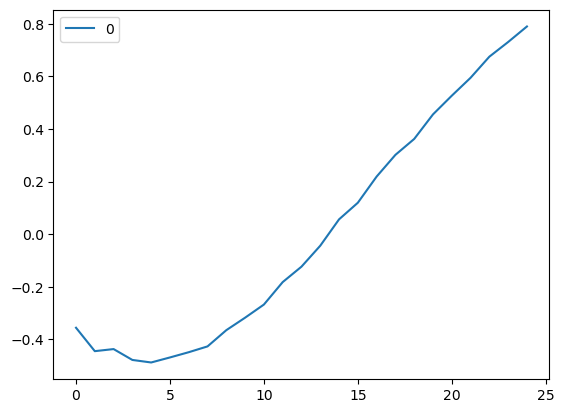

In [42]:
df2.plot(kind="line")

In [43]:
df2.head(5)

,0
0,-0.355987
1,-0.445069
2,-0.437154
3,-0.478501
4,-0.488117


In [45]:
df3=df.iloc[476:501]

In [46]:
df3.reset_index(inplace=True)

In [47]:
df3.head(5)

,index,Sine
0,47.6,-0.458325
1,47.7,-0.544766
2,47.8,-0.625764
3,47.9,-0.700509
4,48.0,-0.768255


In [48]:
df3.drop("index",axis=1,inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_5912\1486109207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop("index",axis=1,inplace=True)


In [49]:
df_concat=pd.concat([df2,df3],axis=1)

In [54]:
df_concat.rename(columns={"0":"predicted","Sine":"actual"},inplace=True)

In [55]:
df_concat

,0,actual
0,-0.355987,-0.458325
1,-0.445069,-0.544766
2,-0.437154,-0.625764
3,-0.478501,-0.700509
4,-0.488117,-0.768255
5,-0.468989,-0.828324
6,-0.449030,-0.880118
7,-0.426954,-0.923117
8,-0.365209,-0.956893
9,-0.317721,-0.981108


<AxesSubplot:>

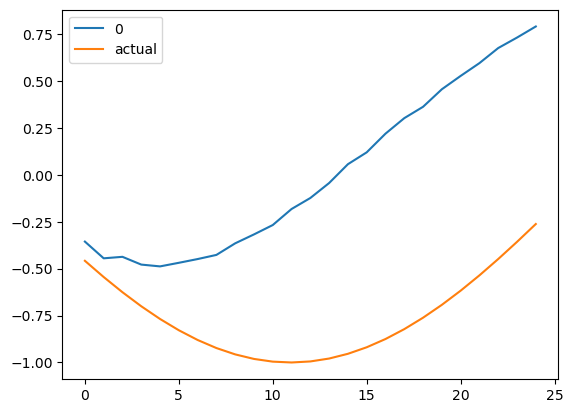

In [56]:
df_concat.plot(kind="line")